In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import splusdata
import seaborn as sns; sns.set()

sns.set_style("ticks")

In [2]:
conn = splusdata.connect('elosch', '@Hydra-Kentaurus1987')

You have access to internal data


In [10]:
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fontsize = 40
labelsize = 30

color_bl = '#648FFF' #blue
color_id = '#785EF0' #indigo
color_mg = '#DC267F' #magenta
color_or = '#FE6100' #orange

### Load data

In [51]:
table_splus = pd.read_csv("tables_photometric/Hydra-Supercluster-SPLUS-Legacy.csv", usecols=["RA", "DEC", "PROB_GAL", "ISOarea", "RMAG", "SG", "r_petro", "zml"])

table_splus_gaia = pd.read_csv("tables_photometric/Hydra-Supercluster-SPLUS-Gaia-Legacy.csv", 
                               usecols=["RA_1", "DEC_1", "SG", "RMAG", "PROB_GAL", "ISOarea", "r_petro", "zml", "ID"])

In [52]:
ra_splus = table_splus["RA"]
dec_splus = table_splus["DEC"]
probgal_splus = table_splus["PROB_GAL"]
isoarea_splus = table_splus["ISOarea"]
rmag_splus = table_splus["RMAG"]
sg_splus = table_splus["SG"]
rpetro_splus = table_splus["r_petro"]
zml_splus = table_splus["zml"]

ra_splus_gaia = table_splus_gaia["RA_1"]
dec_splus_gaia = table_splus_gaia["DEC_1"]
probgal_splus_gaia = table_splus_gaia["PROB_GAL"]
isoarea_splus_gaia = table_splus_gaia["ISOarea"]
rmag_splus_gaia = table_splus_gaia["RMAG"]
sg_splus_gaia = table_splus_gaia["SG"]
rpetro_splus_gaia = table_splus_gaia["r_petro"]
zml_splus_gaia = table_splus_gaia["zml"]
objid_splus_gaia = table_splus_gaia["ID"]

### ISOarea cut

In [5]:
def line(x, a, b):
    y = b + a*x
    return y
    

x = np.linspace(8, 21, 1000)
a = -0.40
b = 1.128

# b = -0.85
# a = -0.27

y = line(x, a, b)

### Calculate purity and completeness

In [49]:
probgal_cut = 0.8
zml_cut = 0.05

purity_splus_isoarea_probgal = []
purity_splus_probgal = []
purity_splus_gaia = []
purity_splus_isoarea_probgal_gaia = []

completeness_splus_isoarea_probgal = []
completeness_splus_probgal = []
completeness_splus_gaia = []
completeness_splus_isoarea_probgal_gaia = []

mags = np.arange(13.0, 21.0, 0.25)
for mlim in mags:  
    
    m_splus = (rmag_splus < mlim) & (zml_splus < zml_cut) & (zml_splus > 0.005)
    m_splus_gaia = (rmag_splus_gaia < mlim) & (zml_splus_gaia < zml_cut) & (zml_splus_gaia > 0.005)
    
    #=======================================================
    #PURITY
    #=======================================================
    
    p1 = (np.sum((m_splus & (np.log10(isoarea_splus) > line(rpetro_splus, a, b)) & (probgal_splus > probgal_cut) & (sg_splus == 0)) / 
                    np.sum(m_splus & (np.log10(isoarea_splus) > line(rpetro_splus, a, b)) & (probgal_splus > probgal_cut))))
    
    p2 = np.sum(m_splus & (probgal_splus > probgal_cut) & (sg_splus == 0)) / np.sum(m_splus & (probgal_splus > probgal_cut))
    
    p3 = np.sum(m_splus_gaia & (sg_splus_gaia == 0)) / np.sum(m_splus_gaia)
    
    p4 = (np.sum(m_splus_gaia & (np.log10(isoarea_splus_gaia) > line(rpetro_splus_gaia, a, b)) & (probgal_splus_gaia > probgal_cut) & (sg_splus_gaia == 0)) / 
                    np.sum(m_splus_gaia & (np.log10(isoarea_splus_gaia) > line(rpetro_splus_gaia, a, b)) & (probgal_splus_gaia > probgal_cut)))
    
    
    #=======================================================
    #COMPLETENESS
    #=======================================================
    
    c1 = np.sum(m_splus & (np.log10(isoarea_splus) > line(rpetro_splus, a, b)) & (probgal_splus > probgal_cut) & (sg_splus == 0)) /  np.sum(m_splus & (sg_splus == 0))
    
    c2 = np.sum(m_splus & (probgal_splus > probgal_cut) & (sg_splus == 0)) / np.sum(m_splus & (sg_splus == 0))
    
    #It is important here to remember that we have to compare the number of galaxies selected using Gaia with the TOTAL number of galaxies we would have,
    #without taking the crossmatch with Gaia into account
    c3 = np.sum(m_splus_gaia & (sg_splus_gaia == 0)) / np.sum(m_splus & (sg_splus == 0))
    
    c4 = (np.sum(m_splus_gaia & (np.log10(isoarea_splus_gaia) > line(rpetro_splus_gaia, a, b)) & (probgal_splus_gaia > probgal_cut) & (sg_splus_gaia == 0)) 
                                                / np.sum(m_splus & (sg_splus == 0)))
    
    
    #=======================================================
    #APPEND TO LISTS
    #=======================================================
    
    purity_splus_isoarea_probgal.append(p1)
    purity_splus_probgal.append(p2)
    purity_splus_gaia.append(p3)
    purity_splus_isoarea_probgal_gaia.append(p4)
    
    completeness_splus_isoarea_probgal.append(c1)
    completeness_splus_probgal.append(c2)
    completeness_splus_gaia.append(c3)
    completeness_splus_isoarea_probgal_gaia.append(c4)

/home/elismar/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


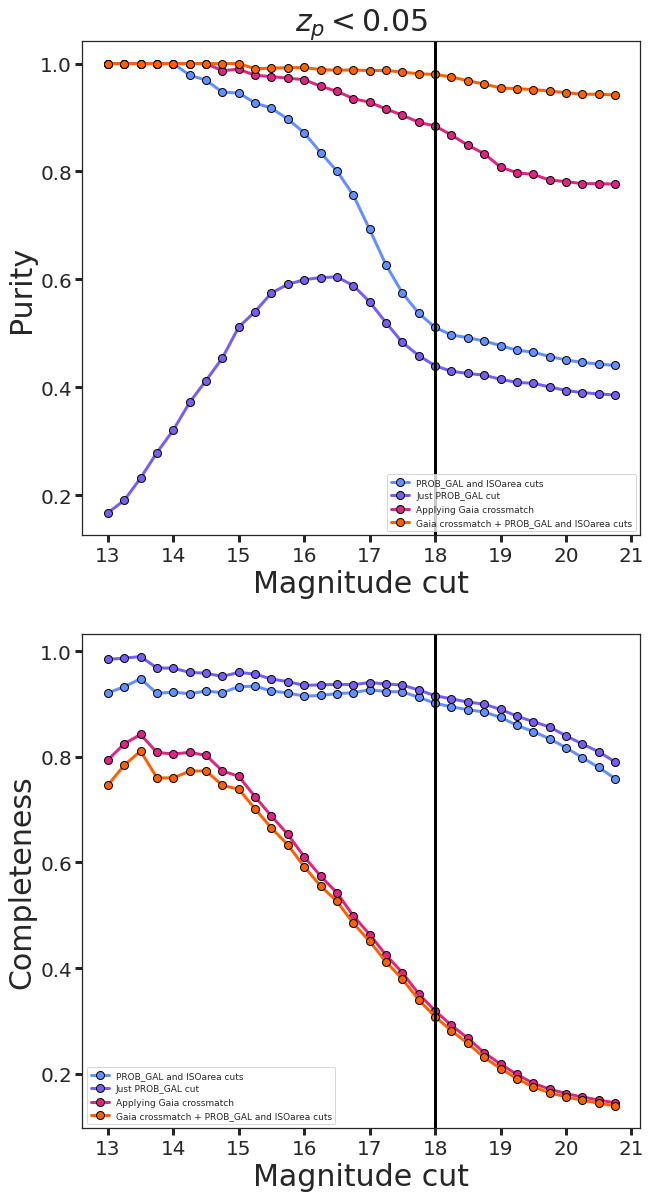

In [50]:
fontsize=30
labelsize=20
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ms = 8
lw = 3
ax1.plot(mags, purity_splus_isoarea_probgal, marker='o', color=color_bl, markerfacecolor=color_bl, label="PROB_GAL and ISOarea cuts", markersize=ms, markeredgecolor="black", linewidth=lw)
ax1.plot(mags, purity_splus_probgal, marker='o', color=color_id, markerfacecolor=color_id, label="Just PROB_GAL cut", markersize=ms, markeredgecolor="black", linewidth=lw)
ax1.plot(mags, purity_splus_gaia, marker='o', color=color_mg, markerfacecolor=color_mg, label="Applying Gaia crossmatch", markersize=ms, markeredgecolor="black", linewidth=lw)
ax1.plot(mags, purity_splus_isoarea_probgal_gaia, marker='o', color=color_or, markerfacecolor=color_or, label="Gaia crossmatch + PROB_GAL and ISOarea cuts", markersize=ms, markeredgecolor="black", linewidth=lw)

ax2.plot(mags, completeness_splus_isoarea_probgal, marker='o', color=color_bl, markerfacecolor=color_bl, label="PROB_GAL and ISOarea cuts", markersize=ms, markeredgecolor="black", linewidth=lw)
ax2.plot(mags, completeness_splus_probgal, marker='o', color=color_id, markerfacecolor=color_id, label="Just PROB_GAL cut", markersize=ms, markeredgecolor="black", linewidth=lw)
ax2.plot(mags, completeness_splus_gaia, marker='o', color=color_mg, markerfacecolor=color_mg, label="Applying Gaia crossmatch", markersize=ms, markeredgecolor="black", linewidth=lw)
ax2.plot(mags, completeness_splus_isoarea_probgal_gaia, marker='o', color=color_or, markerfacecolor=color_or, label="Gaia crossmatch + PROB_GAL and ISOarea cuts", markersize=ms, markeredgecolor="black", linewidth=lw)

ax1.set_ylabel("Purity", fontsize=fontsize)
ax2.set_ylabel("Completeness", fontsize=fontsize)
ax1.set_title(r"$z_p < {:.2f}$".format(zml_cut), fontsize=fontsize)

for ax in [ax1, ax2]:
    ax.xaxis.set_tick_params(labelsize=labelsize, width=3, length=7)
    ax.yaxis.set_tick_params(labelsize=labelsize, width=3, length=7)

    ax.axvline(18, lw=3, color="black")

    # ax.set_title("No cuts in photo-z", fontsize=fontsize)
#     ax.set_title(r"$0.005 < z_p < 0.030$", fontsize=fontsize)
    ax.set_xlabel("Magnitude cut", fontsize=fontsize)
    ax.legend(fontsize=9)
    
plt.savefig("/work/Masters/Pesquisa/Figures/star-galaxy-separation/purity-completeness-isoarea-probgal-gaia-zmlcut{:.2f}.pdf".format(zml_cut), format='pdf') 

### Recreating the final catalogue of Hydra Supercluster

In [57]:
t = pd.read_csv("tables_photometric/Hydra-Supercluster-SPLUS-Gaia.csv")

In [58]:
probgal = t["PROB_GAL"]
objid = t["ID"]
rpetro = t["r_petro"]
isoarea = t["ISOarea"]

In [59]:
probgal_mask = (probgal > probgal_cut)
isoarea_mask = (np.log10(isoarea) > line(rpetro, a, b))
mask = probgal_mask & isoarea_mask

df = t.loc[np.isin(objid, objid[mask])]
df.to_csv("tables_photometric/Hydra-Supercluster-SPLUS-Gaia-probgal&isoarea2.csv", index=False)